<a href="https://colab.research.google.com/github/sandralexis/pppo-rase-pasa/blob/main/Klasifikacija_Sandra_Stojanov_IT78_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Učitavanje podataka i priprema okruženja za rad
Najpre se preuzimaju podaci neophodnih za analizu. Datoteka data.zip sadrži podatke o rasama pasa koji su potrebni za treniranje modela mašinskog učenja. Za preuzimanje datoteke data.zip sa Google Drive-a koristi se komanda wget.

In [28]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UnhXBTPBi_4V1I4X4PY6I-vHmV2gGsz1' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1UnhXBTPBi_4V1I4X4PY6I-vHmV2gGsz1" -O data.zip && rm -rf /tmp/cookies.txt


--2023-07-08 11:58:22--  https://docs.google.com/uc?export=download&confirm=t&id=1UnhXBTPBi_4V1I4X4PY6I-vHmV2gGsz1
Resolving docs.google.com (docs.google.com)... 108.177.98.100, 108.177.98.138, 108.177.98.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/566pla3r2lp5mkijmofr95sov15s9abm/1688817450000/04823654850517145062/*/1UnhXBTPBi_4V1I4X4PY6I-vHmV2gGsz1?e=download&uuid=6c9f65b0-d39f-4721-831b-2c0b9476263c [following]
--2023-07-08 11:58:22--  https://doc-00-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/566pla3r2lp5mkijmofr95sov15s9abm/1688817450000/04823654850517145062/*/1UnhXBTPBi_4V1I4X4PY6I-vHmV2gGsz1?e=download&uuid=6c9f65b0-d39f-4721-831b-2c0b9476263c
Resolving doc-00-40-docs.googleusercontent.com (doc-00-40-docs.googleusercontent.com)... 108.177.98.132, 

Za raspakivanje datoteke data.zip koristi se naredba !unzip -o data.zip.

In [29]:
!unzip -o data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

Za osnovne funkcionalnosti koje će se koristiti u radu, kao što su:
*   manipulacija podacima,
*   vizualizacija,
*   definisanje modela neuronske mrež
*   obrada slika

Uvoze se različite biblioteke i moduli neophodni za obradu podataka.

Uvezeni moduli za: upravljanje memorijom, prikazivanje napretka iteracija petlji i prikazivanje slika u Colab okruženju.

Uključene biblioteke su: NumPy, Pandas, TensorFlow, Matplotlib i Keras.



In [30]:
import numpy as np
import pandas as pd
import os, cv2, random, time, shutil, csv
import tensorflow as tf
import matplotlib.pyplot as plt
import gc
from tqdm import tqdm
from google.colab.patches import cv2_imshow


import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Lambda, Dropout, InputLayer, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img

Pri pripremi podataka za obradu korišćena je funkcija count_files(path) za brojanje ukupnog broja datoteka u određenom direktorijumu.

Prvo se proverava da li direktorijum postoji koristeći funkciju os.path.exists(path). Ako direktorijum postoji koristi se os.walk(path) za prolazak kroz sve poddirektorijume i datoteke u direktorijumu. Izračunava se broj datoteka u svakom poddirektorijumu i taj broj se sabira korišćenjem sum() funkcije.


In [31]:
def count_files(path):
    if not os.path.exists(path):
        return 0
    return sum([len(files) for r, d, files in os.walk(path)])

Zbog pravilnog podešavanja i evaluacije modela vrši se izračunavanju veličina trening i test skupa podataka koristeći funkcija count_files().
Promenljive train_dir i test_dir sadrže putanje do direktorijuma trening i test skupova podataka.
Koristeći funkciju print() ispisuju se podaci o broju datoteka u svakom skupu podataka.

In [32]:
train_dir = 'train'
test_dir = 'test'

data_size = count_files(train_dir)
test_size = count_files(test_dir)
print('Veličina trening skupa podataka: ', data_size)
print('Veličina test skupa podataka: ', test_size)

Veličina trening skupa podataka:  10222
Veličina test skupa podataka:  10357


Za čitanje podataka iz CSV datoteka koristi se biblioteka Pandas. Pomoću funkcije pd.read_csv() čitaju se podaci iz datoteka 'labels.csv' i 'sample_submission.csv'.

In [33]:
labels_df = pd.read_csv('labels.csv')
sample_df = pd.read_csv('sample_submission.csv')
labels_df.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


# Prikaz test fotografija za analizu
Kako bi se izvršila vizuelna analiza podataka i postiglo razumevanje karakteristika slika iz skupa podataka, vrši se učitavanje i prikazivanje slika pasa.

Koristeći funkciju cv2.imread() učitava se slika psa sa putanjom "train/000bec180eb18c7604dcecc8fe0dba07.jpg". Rezultat se dodeljuje promenljivoj img. Funkcija cv2_imshow() prikazuje učitanu sliku img u Colab okruženju.

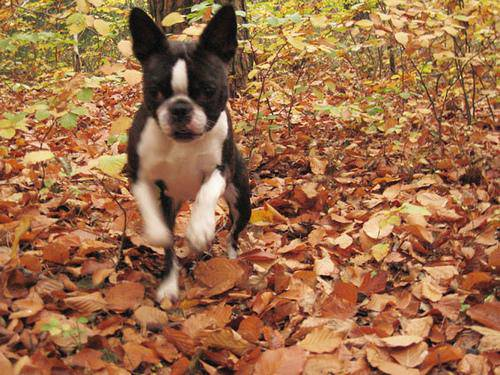

In [34]:
img = cv2.imread("train/000bec180eb18c7604dcecc8fe0dba07.jpg")
cv2_imshow(img)

# Prebrojavanje i ispis jedinstvenih rasa
Za razumevanje raspodele podataka i odabir odgovarajućih strategija prilikom treniranja modela vrši se prebrojavanje jedinstvenih rasa pasa.

Koristi se metoda value_counts(), nad kolonom "breed" DataFrame-a labels_df, kako bi se izračunala brojnost svake rase pasa. Zatim se ispisuju sve jedinstvene rase pasa iz skupa podataka i njihova brojnost.

In [35]:
unique_breeds = labels_df["breed"].value_counts()
print(unique_breeds)

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64


# Sortiranje i prikaz liste prvih nekoliko rasa
Za definisanje broja izlaznih neurona u modelu mašinskog učenja i razumevanje raznolikosti podataka o rasama pasa koristi se DataFrame labels_df kako bi se dobio spisak različitih rasa pasa i izračunao broj klasa.

Pomoću set() funkcije uklanjaju se duplicirane vrednosti iz kolone 'breed' DataFrame-a labels_df. Pomoću len() funkcije izračunava se broj različitih rasa pasa, čime se određuje broj klasa. Rezultat se ispisuje. Pomoću slicing ([:10]) prikazuje se samo prvih 10 rasa pasa iz liste dog_breeds.

In [36]:
dog_breeds = sorted(list(set(labels_df['breed'])))
n_classes = len(dog_breeds)
print(n_classes)
dog_breeds[:10]

120


['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle']

# Kreiranje rečnika
Zbog treniranja modela mašinskog učenja potrebno je kreirati rečnik za mapiranje rasa pasa na numeričke vrednosti.

Rečnik se kreira pomoću dog_breeds liste rasa pasa i n_classes broja klasa.
Funkcija zip() se koristi za kombinovanje liste dog_breeds (rasa pasa) sa opsegom brojeva od 0 do n_classes-1. Zatim, funkcija dict() pretvara kombinovane parove u rečnik, gde je svaka rasa pasa ključ, a odgovarajući broj je vrednost.


In [37]:
class_to_num = dict(zip(dog_breeds, range(n_classes)))

# Konverzija slika u nizove
Za dalju obradu i treniranje modela vrši se konverzija slika u numpy nizove i odgovarajuće oznake pomoću funkcije images_to_array().


Ova funkcija prima sledeće argumente:

*   data_dir - predstavlja direktorijum sa slikama,
*   labels_df DataFrame - sadrži informacije o slikama i oznakama rasa pasa,
*   img_size - određuje dimenzije slika koje će se koristiti.


Prvo se izvlače kolone 'id' i 'breed' iz DataFrame-a labels_df.
Zatim se inicijalizuju izlazni nizovi X i y koristeći np.zeros() funkciju, pri čemu se dimenzije nizova određuju na osnovu data_size (broj slika) i img_size (dimenzije slika).


Nakon toga for petlja prolazi kroz svaku sliku. U svakoj iteraciji, učitava se slika sa odgovarajućeg direktorijuma, koristeći load_img() funkciju iz Keras biblioteke. Oznaka rase pasa se takođe čita iz images_labels DataFrame-a.

U okviru petlje, učitane slike se smeštaju u X niz, a odgovarajuće oznake se smeštaju u y niz. Oznake se mapiraju na numeričke vrednosti koristeći class_to_num rečnik.


Nakon toga, oznake y se konvertuju u kategorički oblik pomoću to_categorical() funkcije iz Keras biblioteke. Takođe, nizovi X i y se permutuju nasumično koristeći np.random.permutation() funkciju.

In [38]:
def images_to_array(data_dir, labels_df, img_size = (224,224,3)):

    images_names = labels_df['id']
    images_labels = labels_df['breed']
    data_size = len(images_names)

    #Inicijalizovanje izlaznih nizova
    X = np.zeros([data_size, img_size[0], img_size[1], img_size[2]], dtype=np.uint8)
    y = np.zeros([data_size,1], dtype=np.uint8)

    #Citanje podataka i oznaka
    for i in tqdm(range(data_size)):
        image_name = images_names[i]
        img_dir = os.path.join(data_dir, image_name+'.jpg')
        img_pixels = load_img(img_dir, target_size=img_size)
        image_breed = images_labels[i]

        X[i] = img_pixels
        y[i] = class_to_num[image_breed]


    y = to_categorical(y)
    ind = np.random.permutation(data_size)
    X = X[ind]
    y = y[ind]
    print('Veličina izlaznih podataka: ', X.shape)
    print('Veličina izlaznih oznaka: ', y.shape)
    return X, y
    gc.collect()

Kod pripreme podataka za treniranje modela vrši se i konverzija slika iz trening skupa podataka u numpy nizove (X) i odgovarajuće oznake (y).
Koristi se funkcija images_to_array() za konvertovanje slike u numpy nizove i odgovarajuće oznake. Pritom, postavljaju se i dimenzije slika.

In [39]:
img_size = (250,250,3)
X, y = images_to_array(train_dir, labels_df, img_size)

100%|██████████| 10222/10222 [00:55<00:00, 183.32it/s]


Veličina izlaznih podataka:  (10222, 250, 250, 3)
Veličina izlaznih oznaka:  (10222, 120)


# Izdvajanje osobina slika
Za dalje analize i treniranje modela potrebno je dobiti i osobine slika.
Koristi se funkcija get_features() za ekstrakciju osobina (features) iz slika, pomoću prethodno obučenog modela. Dobijene mape osobina se ispisuju i vraćaju kao rezultat funkcije.
Funkcija get_features() priprema pipeline za ekstrakciju osobina i koristi:
*   ulazni sloj,
*   preprocesira podatke,
*   kreira bazu modela bez potpuno povezanog sloja,
*   dodaje sloj globalnog prosečnog sažimanja,
*   i kreira model za ekstrakciju osobina.

Funkcija gc.collect() se koristi za oslobađanje memorije.

In [40]:
def get_features(model_name, data_preprocessor, input_size, data):

    # Priprema pipeline-a
    input_layer = Input(input_size)
    preprocessor = Lambda(data_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs=input_layer, outputs=avg)

    # Ekstrakcija osobina
    feature_maps = feature_extractor.predict(data, batch_size=64, verbose=1)
    print('Veličina mapa osobina: ', feature_maps.shape)
    return feature_maps
    gc.collect()


Koristi se InceptionV3 model iz Keras biblioteke, kao i odgovarajuća funkcija preprocess_input() za preprocesiranje podataka pre nego što se proslede InceptionV3 modelu. Takođe se koristi funkcija get_features() za ekstrakciju osobina.

In [41]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)

160/160 [==============================] - 1580s 10s/step
Veličina mapa osobina:  (10222, 2048)


Zatim se vrši čuvanje (kopiranje) i prikazivanje konačnih mapa osobina dobijenih ekstrakcijom pomoću InceptionV3 modela, kako bi se dobile informacije o broju instanci (slika) i dimenzijama osobina koje su izdvojene.

In [42]:
final_features = inception_features
print('Veličina konačnih mapa osobina:', final_features.shape)

Veličina konačnih mapa osobina: (10222, 2048)


# Definisanje EarlyStopping callback-a


Za sprečavanje preteranog treniranja i poboljšanja generalizacije modela, definiše se callback EarlyStopping, koji će se koristiti tokom treniranja modela kako bi se pravovremeno zaustavilo treniranje i sačuvali najbolji modeli.

Koristi se modul EarlyStopping iz Keras biblioteke kako bi se definisao callback EarlyStop_callback. On se koristiti tokom treniranja modela kako bi se zaustavilo treniranje ukoliko se funkcija gubitka (val_loss) na validacionom skupu ne poboljšava tokom određenog broja epoha (patience).
Takođe, podešen je i parametar restore_best_weights=True kako bi se sačuvali najbolji modeli sa najmanjom vrednošću funkcije gubitka na validacionom skupu.

In [43]:
from keras.callbacks import EarlyStopping
# Priprema callback-ova
EarlyStop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
my_callback=[EarlyStop_callback]

# *DNN model*


DNN (Deep Neural Network) model je arhitektura neuronske mreže sa više gustih slojeva (fully connected layers). Odabrana je u ovom projektu zbog svoje sposobnosti da nauči složene veze između slika pasa i rasa pasa. Takođe, DNN modeli su fleksibilni i mogu se prilagoditi različitim veličinama ulaza i broju klasa. U ovom projektu je korišćen prethodno obučen InceptionV3 model koji je već naučio reprezentaciju slika. DNN modeli su široko podržani u popularnim bibliotekama za mašinsko učenje, kao što je Keras, što olakšava treniranje i evaluaciju modela.

Kako bi se izvršilo obučavanje modela na osnovu ekstrahiranih osobina i njihovih odgovarajućih oznaka vrši se definisanje, kompajliranje i treniranje DNN modela.

Koristeći Sequential model iz Keras biblioteke definiše se DNN model. Model sadrži:

*   ulazni sloj (InputLayer) - sa dimenzijama mape osobina final_features.shape,
*   sloj isključenja (Dropout) - sa stopom isključenja od 0.75,
*   gusti sloj (Dense) - sa 512 neurona i aktivacionom funkcijom ReLU,
*   sloj isključenja - sa stopom isključenja od 0.75,
*   gusti sloj - sa n_classes izlaznih neurona i aktivacionom funkcijom softmax.

Nakon toga, definiše se optimizator Adam za optimizaciju modela.
Sledeći korak je kompajliranje modela korišćenjem compile() metode. Zatim se model trenira pozivom metode fit() nad modelom.

In [44]:
gc.collect()
# Priprema DNN modela
model = keras.models.Sequential([
    InputLayer(final_features.shape[1:]),
    Dropout(0.75),
    Dense(512, activation='relu'),
    Dropout(0.75),
    Dense(n_classes, activation='softmax')
])
# Adam optimizacija
optimizer = keras.optimizers.Adam()
# Kompajliranje modela
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
            metrics=['accuracy'])
# Treniranje modela
history = model.fit(final_features, y,
                  batch_size=128,
                  epochs=60,
                  validation_split=0.1,
                  callbacks=my_callback)
gc.collect()

Epoch 1/60
72/72 [==============================] - 3s 32ms/step - loss: 4.9082 - accuracy: 0.0355 - val_loss: 4.1988 - val_accuracy: 0.4575
Epoch 2/60
72/72 [==============================] - 2s 27ms/step - loss: 3.6202 - accuracy: 0.2031 - val_loss: 1.6833 - val_accuracy: 0.7752
Epoch 3/60
72/72 [==============================] - 2s 25ms/step - loss: 2.3682 - accuracy: 0.4170 - val_loss: 0.8702 - val_accuracy: 0.8192
Epoch 4/60
72/72 [==============================] - 2s 23ms/step - loss: 1.8645 - accuracy: 0.5279 - val_loss: 0.6651 - val_accuracy: 0.8446
Epoch 5/60
72/72 [==============================] - 2s 27ms/step - loss: 1.5815 - accuracy: 0.5830 - val_loss: 0.5914 - val_accuracy: 0.8368
Epoch 6/60
72/72 [==============================] - 3s 36ms/step - loss: 1.4394 - accuracy: 0.6134 - val_loss: 0.5726 - val_accuracy: 0.8436
Epoch 7/60
72/72 [==============================] - 3s 46ms/step - loss: 1.3521 - accuracy: 0.6399 - val_loss: 0.5440 - val_accuracy: 0.8407
Epoch 8/60
72

1550

# Prikaz tačnosti istreniranog modela

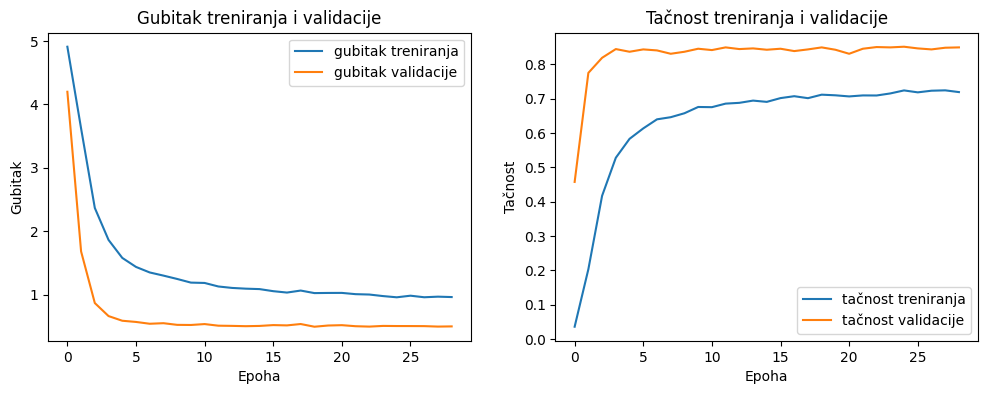

In [45]:
# Prikaz rezultata
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='gubitak treniranja')
plt.plot(history.history['val_loss'], label='gubitak validacije')
plt.legend()
plt.title('Gubitak treniranja i validacije')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='tačnost treniranja')
plt.plot(history.history['val_accuracy'], label='tačnost validacije')
plt.legend()
plt.title('Tačnost treniranja i validacije')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.show()

In [46]:
# Evaluacija modela na testnim podacima
loss, accuracy = model.evaluate(final_features, y)

# Ispis konacnog gubitka i tacnosti
print("Konačni Gubitak:", loss)
print("Konačna Tačnost:", accuracy)

320/320 [==============================] - 1s 4ms/step - loss: 0.4398 - accuracy: 0.8773
Konačni Gubitak: 0.439799427986145
Konačna Tačnost: 0.8773234486579895


# Koverzija testnih slika u nizove i priprema testnih podataka

Za pripremu testnih podataka za evaluaciju treniranog modela vrši se konverzija testnih slika u numpy nizove pomoću funkcije images_to_array2().

U okviru funkcije se inicijalizuje niz X koji će sadržati konvertovane slike. Veličina niza se određuje na osnovu broja slika (data_size) i dimenzija slika (img_size).


For petlja prolazi kroz svaku sliku. U svakoj iteraciji, čita se ime slike, formira se putanja do slike (img_dir), a zatim se koristi tf.keras.preprocessing.image.load_img() funkcija za učitavanje slike sa odgovarajućim dimenzijama.
Učitane slike se smeštaju u niz X na odgovarajući indeks.



In [47]:
gc.collect()
def images_to_array2(data_dir, labels_df, img_size = (224,224,3)):

    images_names = labels_df['id']
    data_size = len(images_names)
    X = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)

    for i in tqdm(range(data_size)):
        image_name = images_names[i]
        img_dir = os.path.join(data_dir, image_name+'.jpg')
        img_pixels = tf.keras.preprocessing.image.load_img(img_dir, target_size=img_size)
        X[i] = img_pixels

    print('Veličina izlaznih podataka: ', X.shape)
    return X

test_data = images_to_array2(test_dir, sample_df, img_size)

100%|██████████| 10357/10357 [00:49<00:00, 209.92it/s]

Veličina izlaznih podataka:  (10357, 250, 250, 3)



Funkcija get_features() se koristi kako bi se izdvojile osobine (features) testnih podataka.

In [48]:
# Izdvajanje osobina
inception_features = get_features(InceptionV3, inception_preprocessor, img_size, test_data)

test_features = inception_features
print('Oblik mape konačnih osobina', test_features.shape)

162/162 [==============================] - 1622s 10s/step
Veličina mapa osobina:  (10357, 2048)
Oblik mape konačnih osobina (10357, 2048)


Potrebno je dobiti predviđene vrednosti za testne podatke korišćenjem treniranog modela kako bi se kasnije mogli uporediti sa stvarnim vrednostima i procenila tačnost modela.

Pomoću predict() metode dobijaju se predviđeni rezultati za testne osobine test_features. Specificira se i veličina grupe (batch_size) nad kojom će se izvršiti predviđanje.

In [49]:
y_pred = model.predict(test_features, batch_size=128)

81/81 [==============================] - 1s 10ms/step


# Generisanje CSV fajla sa predviđanjima
Za evaluaciju performansi modela i pripremu rezultata za dalju analizu generiše se CSV fajl submission.csv koji sadrži predviđene rezultate za svaku rasu pasa iz dog_breeds.

Petlja for prolazi kroz svaku rasu pasa b u dog_breeds listi. Za svaku rasu pasa, dodaje se nova kolona u DataFrame sample_df koja sadrži predviđene vrednosti iz y_pred niza. Indeksi za predviđene vrednosti se dobijaju korišćenjem class_to_num rečnika za mapiranje rase pasa na odgovarajući indeks u y_pred nizu.
Nakon petlje, DataFrame sample_df se čuva u CSV fajlu submission.csv korišćenjem to_csv() metode. Pomoću index=True indeksi DataFrame-a se čuvaju u CSV fajlu.


In [50]:
for b in dog_breeds:
    sample_df[b] = y_pred[:,class_to_num[b]]
sample_df.to_csv('submission.csv', index=True)

# Prikaz rezultata
Za prikazivanje rezultata i dalju analizu generiše se DataFrame-a result_df koji sadrži informacije o identifikacionim brojevima pasa (id) i njihovim najverovatnijim rasama (breeds) na osnovu predviđenih rezultata.

Korišćenjem idxmax() metode nad svim kolonama DataFrame-a sample_df.iloc[:, 1] traži se indeksna oznaka najveće vrednosti u svakoj vrsti (rasa psa).

Nakon toga se čuva i prva kolona DataFrame-a sample_df.iloc[:, 0] koja sadrži identifikacione brojeve pasa.

Korišćenjem pd.DataFrame() konstruktora kreira se novi DataFrame result_df sa kolonama id i breeds. Za prikazivanje rezultata ispisuje se DataFrame result_df.

In [51]:
max_column = sample_df.iloc[:, 1:].idxmax(axis=1)
ids = sample_df.iloc[:, 0]
result_df = pd.DataFrame({'id': ids, 'breeds': max_column})
print(result_df)

                                     id            breeds
0      000621fb3cbb32d8935728e48679680e  japanese_spaniel
1      00102ee9d8eb90812350685311fe5890           samoyed
2      0012a730dfa437f5f3613fb75efcd4ce    english_setter
3      001510bc8570bbeee98c8d80c8a95ec1               pug
4      001a5f3114548acdefa3d4da05474c2e             lhasa
...                                 ...               ...
10352  ffeda8623d4eee33c6d1156a2ecbfcf8   standard_poodle
10353  fff1ec9e6e413275984966f745a313b0        weimaraner
10354  fff74b59b758bbbf13a5793182a9bbe4             dhole
10355  fff7d50d848e8014ac1e9172dc6762a3             lhasa
10356  fffbff22c1f51e3dc80c4bf04089545b   irish_wolfhound

[10357 rows x 2 columns]


Za vizuelnu proveru tačnosti predviđanja i uvid u rezultate modela pomoću funkcije preview_predict(dataset) vrši se prikazivanje slika iz dataseta zajedno sa njihovim predviđenim rasama.

Pomoću for petlje prolazi se kroz svaku vrstu (red) u dataset. Za svaku sliku, čita se identifikacioni broj (image_id) i predviđena rasa (breed). Zatim se formira putanja do slike koristeći image_id i dodaje se prefiks 'test/'. Slika se prikazuje koristeći display() funkciju iz IPython.display biblioteke. Nakon toga se ispisuje predviđena rasa.

In [52]:
from IPython.display import display, Image
def preview_predict(dataset):
    for index, row in dataset.iterrows():
      image_id = row['id']
      breed = row['breeds']

      image_path = 'test/' + image_id + '.jpg'
      display(Image(filename=image_path))
      print('Predviđena rasa:', breed)
      print('\n')

Zatim se vrši izbor slučajnih 50 redova iz DataFrame-a result_df pomoću metode sample() i funkcija preview_predict() prikazuje slike i predviđene rase za taj izabrani podskup.

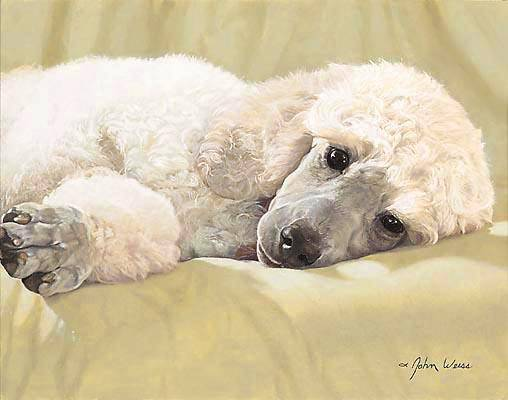

Predviđena rasa: miniature_poodle




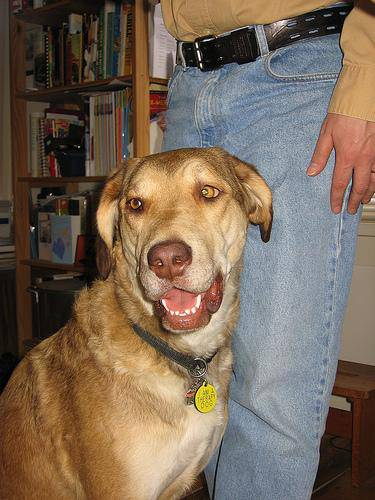

Predviđena rasa: chesapeake_bay_retriever




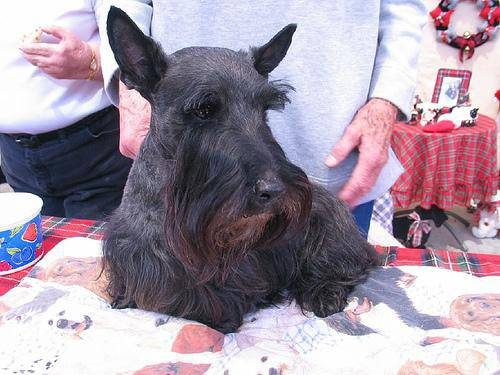

Predviđena rasa: scotch_terrier




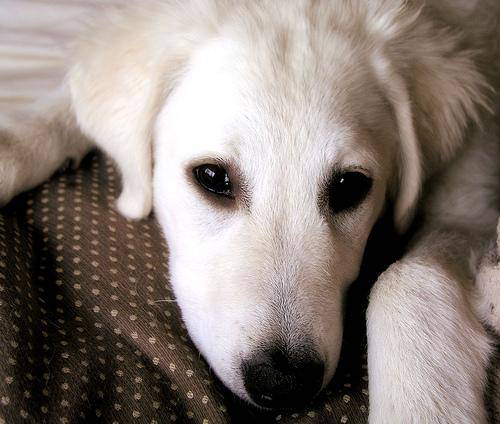

Predviđena rasa: kuvasz




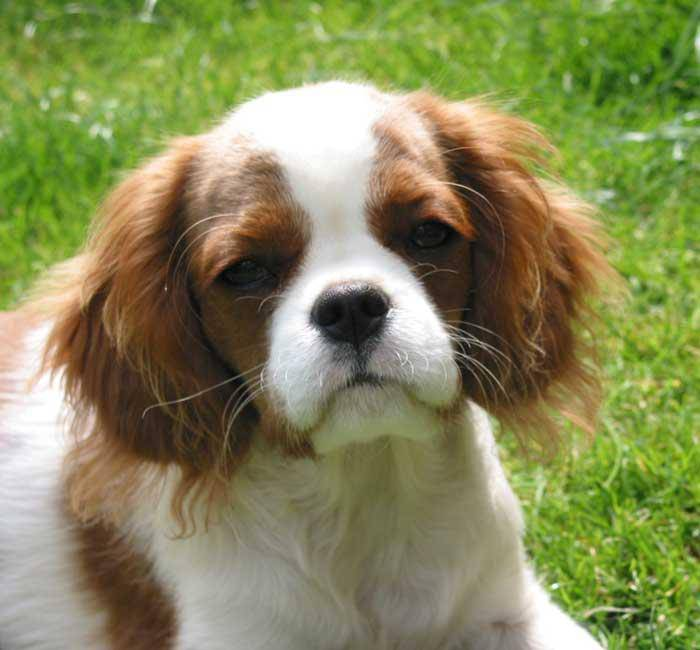

Predviđena rasa: blenheim_spaniel




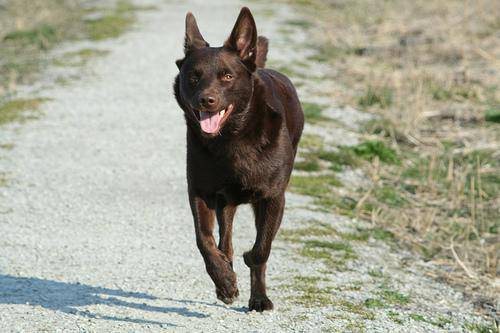

Predviđena rasa: kelpie




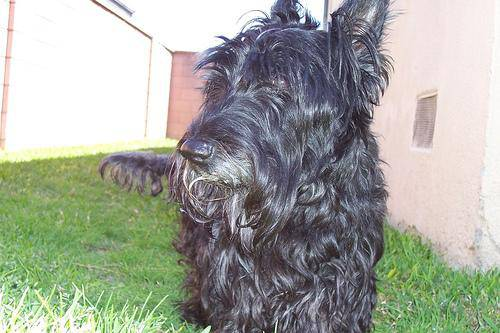

Predviđena rasa: scotch_terrier




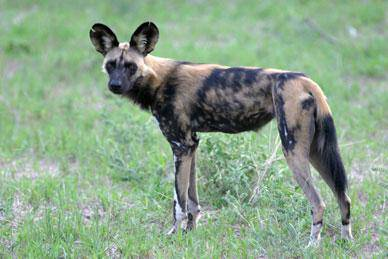

Predviđena rasa: african_hunting_dog




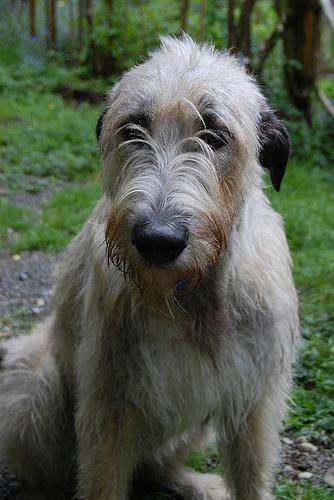

Predviđena rasa: irish_wolfhound




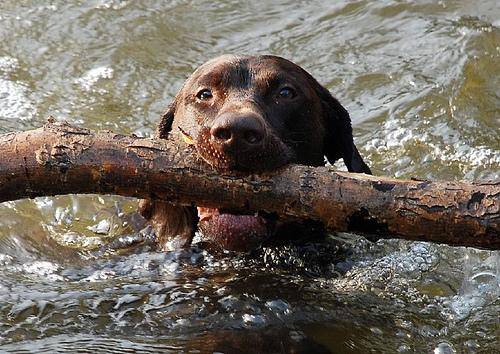

Predviđena rasa: chesapeake_bay_retriever




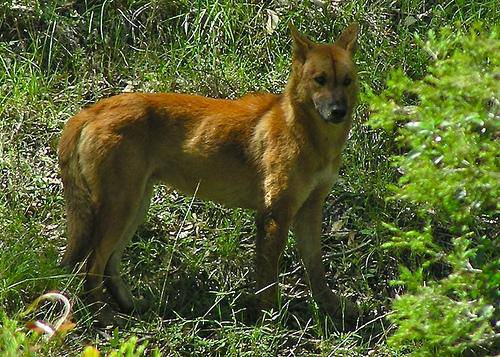

Predviđena rasa: dingo




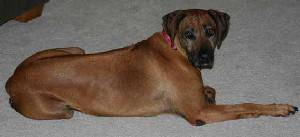

Predviđena rasa: rhodesian_ridgeback




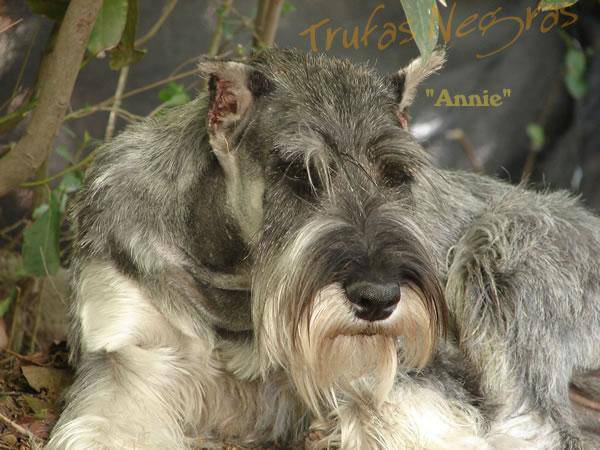

Predviđena rasa: standard_schnauzer




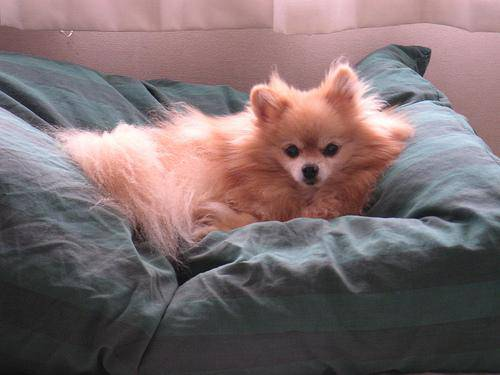

Predviđena rasa: pomeranian




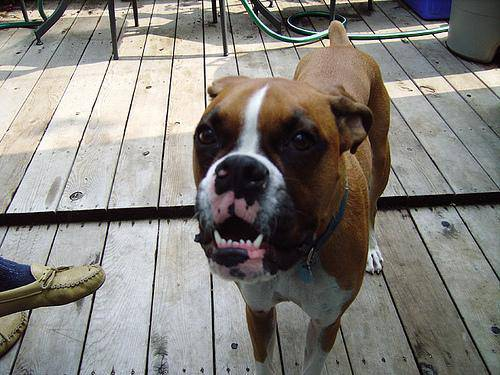

Predviđena rasa: boxer




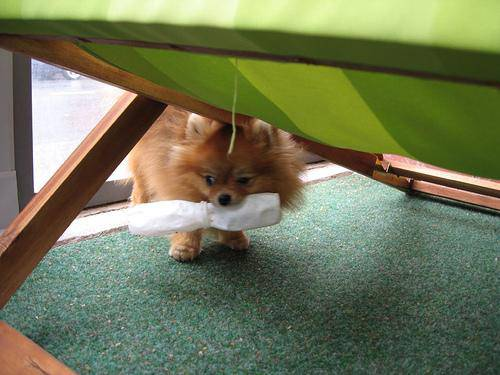

Predviđena rasa: pomeranian




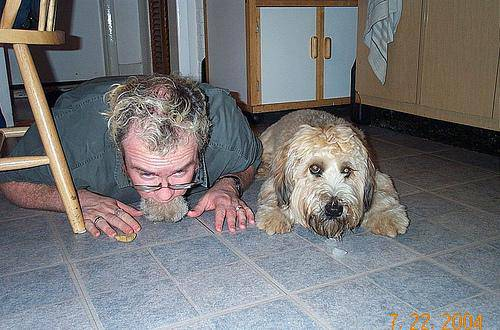

Predviđena rasa: soft-coated_wheaten_terrier




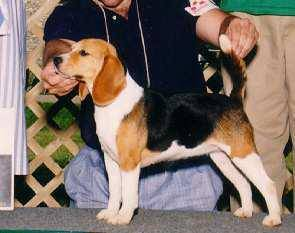

Predviđena rasa: english_foxhound




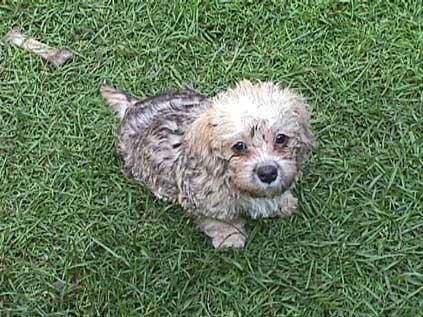

Predviđena rasa: dandie_dinmont




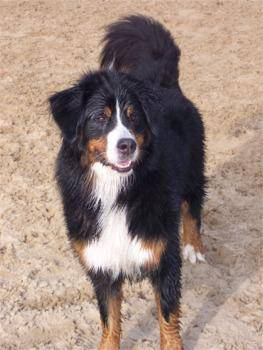

Predviđena rasa: bernese_mountain_dog




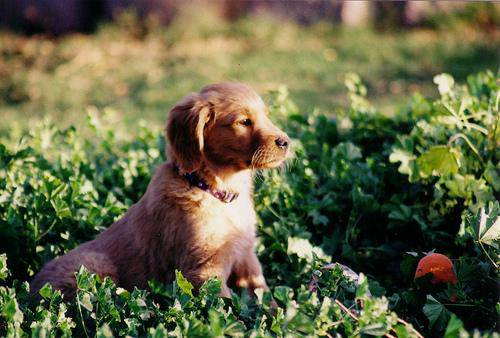

Predviđena rasa: irish_setter




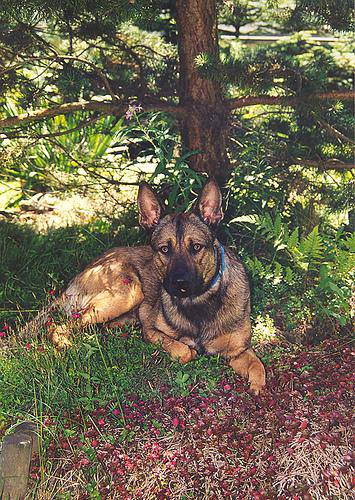

Predviđena rasa: german_shepherd




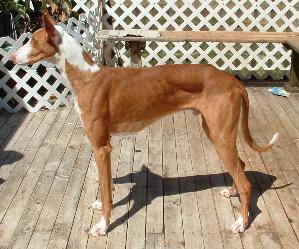

Predviđena rasa: ibizan_hound




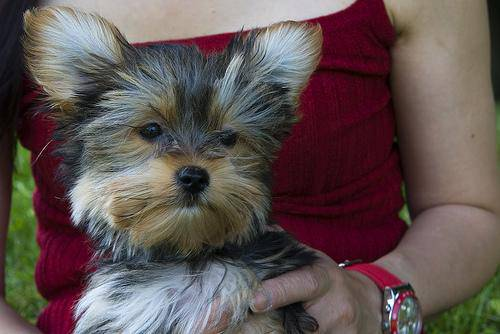

Predviđena rasa: yorkshire_terrier




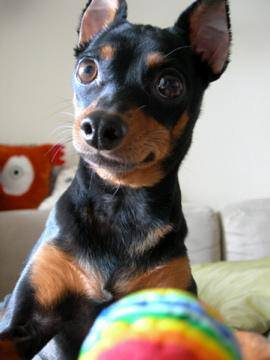

Predviđena rasa: miniature_pinscher




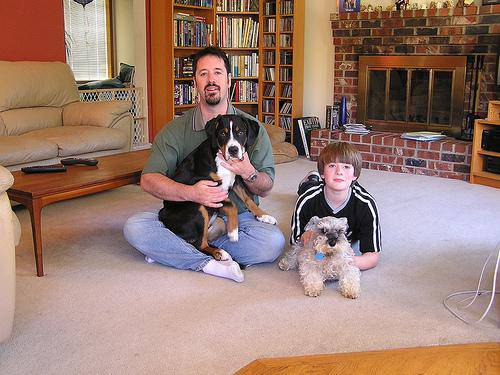

Predviđena rasa: greater_swiss_mountain_dog




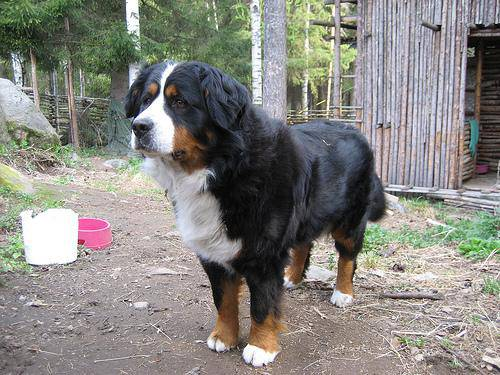

Predviđena rasa: bernese_mountain_dog




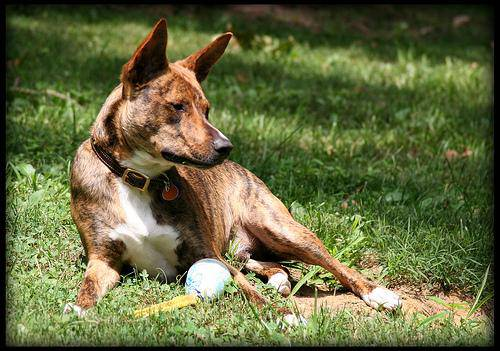

Predviđena rasa: basenji




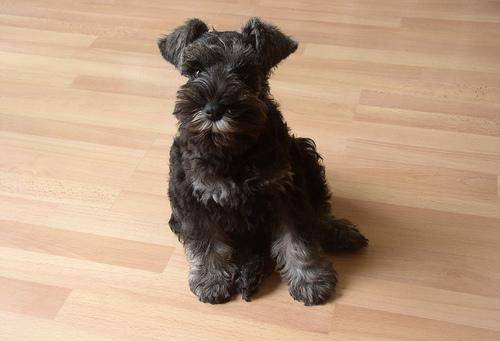

Predviđena rasa: kerry_blue_terrier




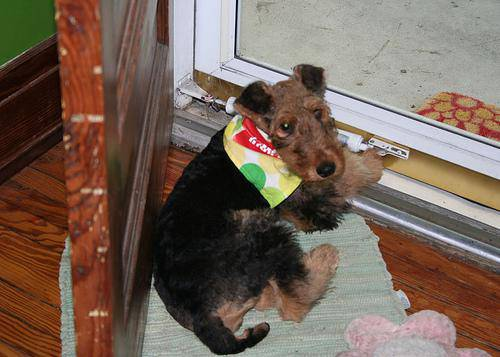

Predviđena rasa: airedale




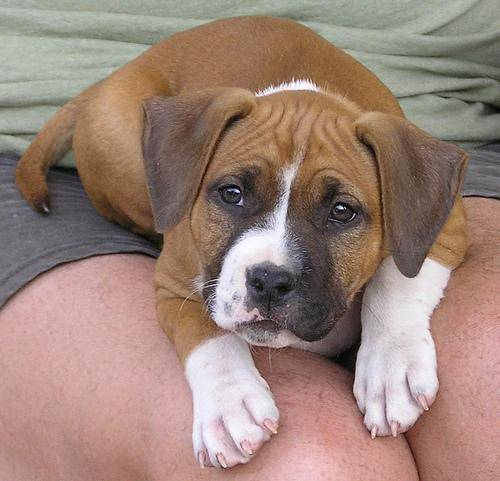

Predviđena rasa: american_staffordshire_terrier




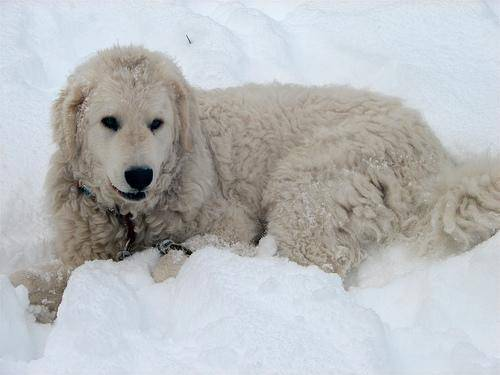

Predviđena rasa: kuvasz




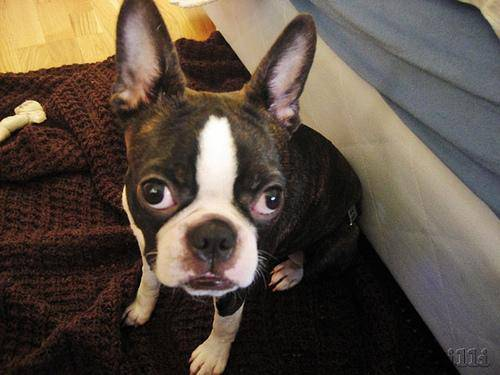

Predviđena rasa: boston_bull




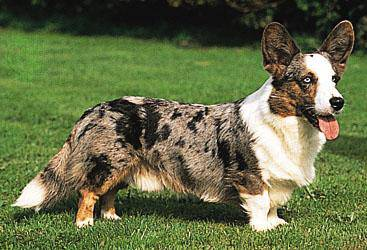

Predviđena rasa: cardigan




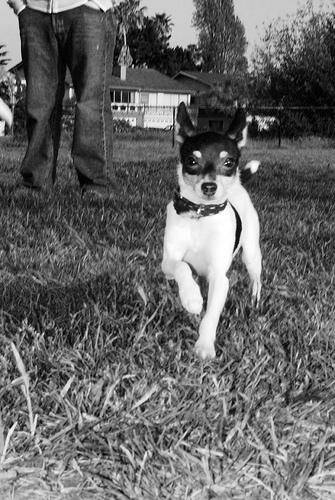

Predviđena rasa: toy_terrier




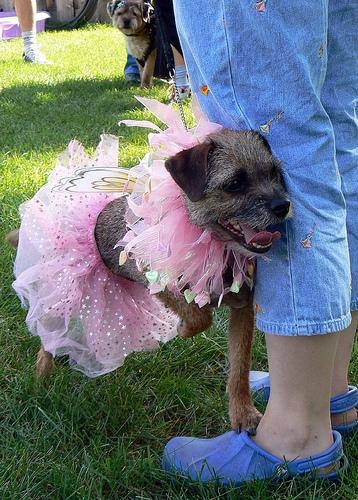

Predviđena rasa: cairn




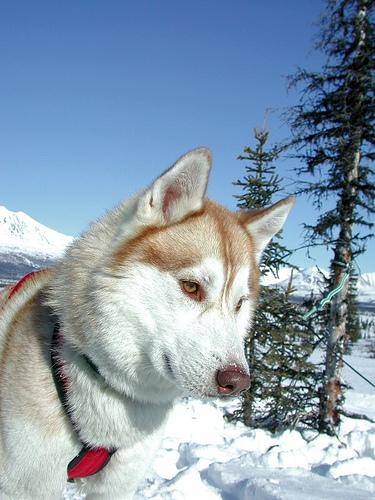

Predviđena rasa: siberian_husky




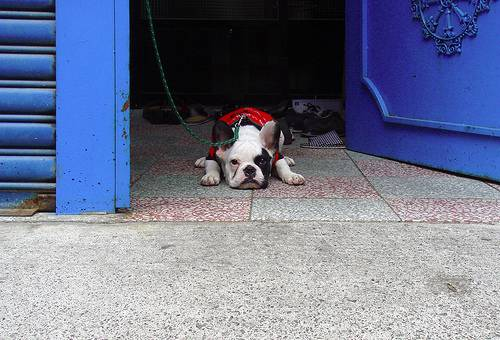

Predviđena rasa: toy_terrier




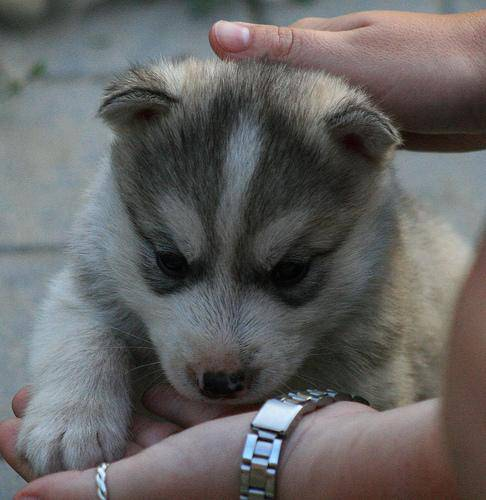

Predviđena rasa: siberian_husky




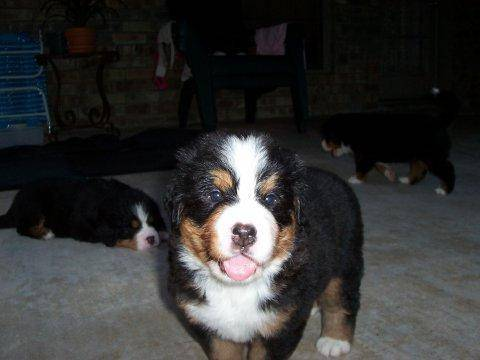

Predviđena rasa: bernese_mountain_dog




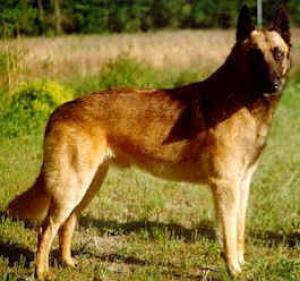

Predviđena rasa: malinois




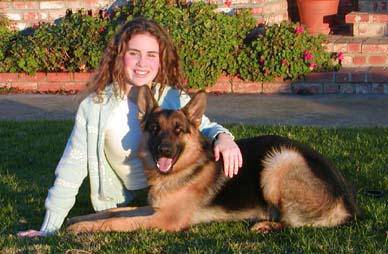

Predviđena rasa: german_shepherd




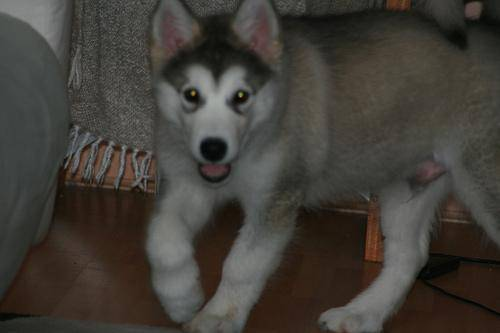

Predviđena rasa: malamute




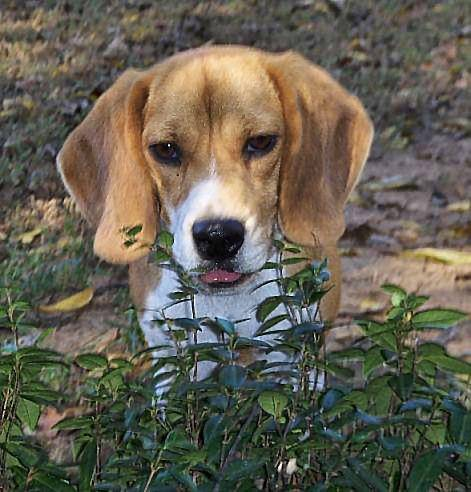

Predviđena rasa: beagle




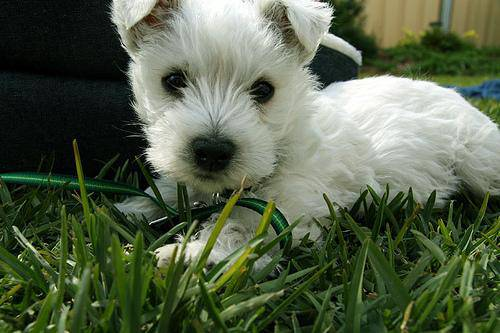

Predviđena rasa: west_highland_white_terrier




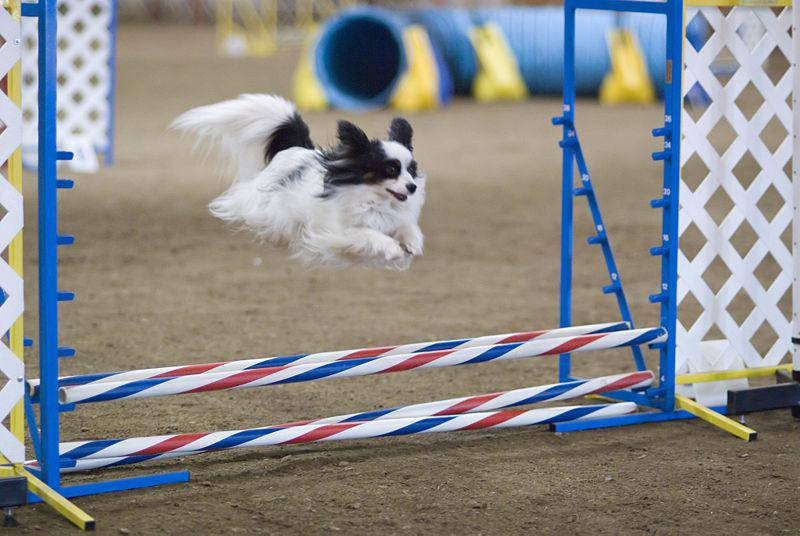

Predviđena rasa: papillon




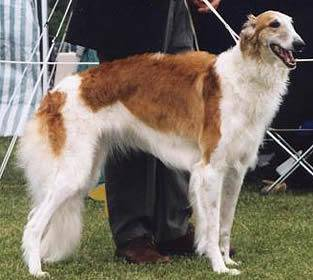

Predviđena rasa: borzoi




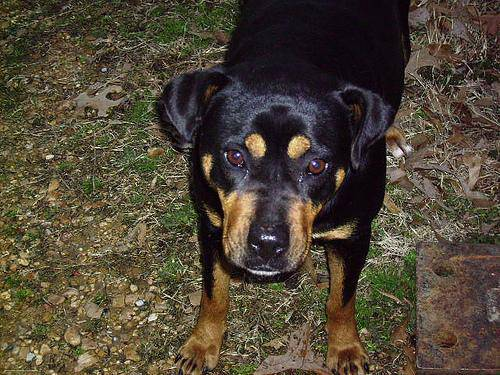

Predviđena rasa: rottweiler




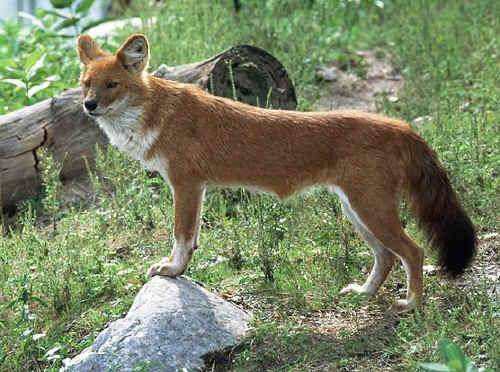

Predviđena rasa: dhole




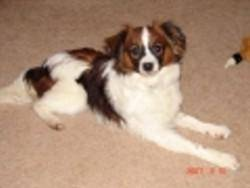

Predviđena rasa: papillon




In [53]:
filtered_df = result_df.sample(50)

preview_predict(filtered_df)


Ovde se vrši filtriranje DataFrame-a result_df, pomoću uslovnog indeksiranja,tako da se izaberu samo redovi koji sadrže predviđenu rasu pasa 'pomeranian', bira se slučajnih 10 redova iz DataFrame-a result_df pomoću metode sample() i funkcija preview_predict() prikazuje slike i predviđene rase za taj filtrirani podskup.

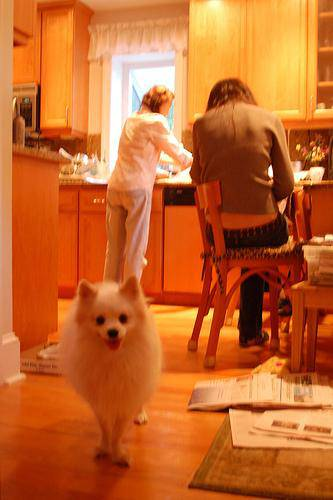

Predviđena rasa: pomeranian




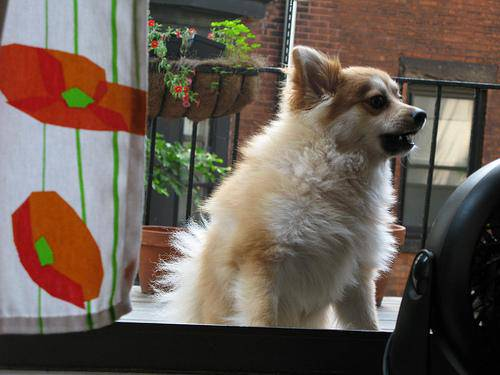

Predviđena rasa: pomeranian




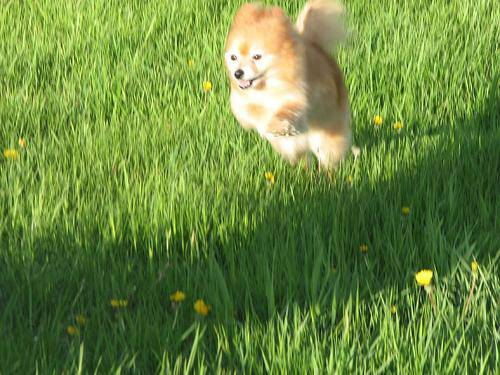

Predviđena rasa: pomeranian




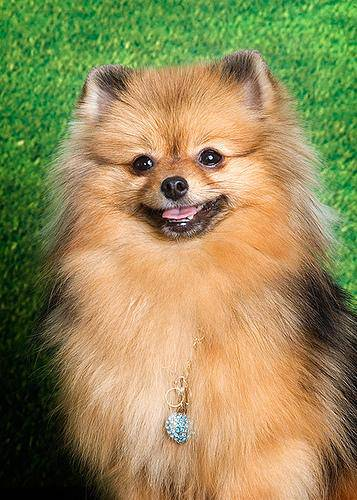

Predviđena rasa: pomeranian




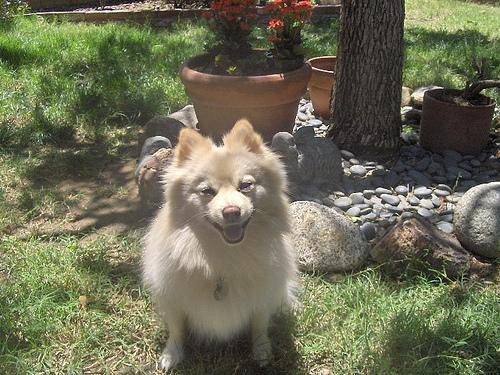

Predviđena rasa: pomeranian




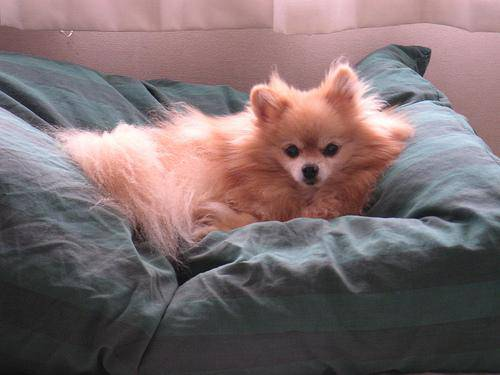

Predviđena rasa: pomeranian




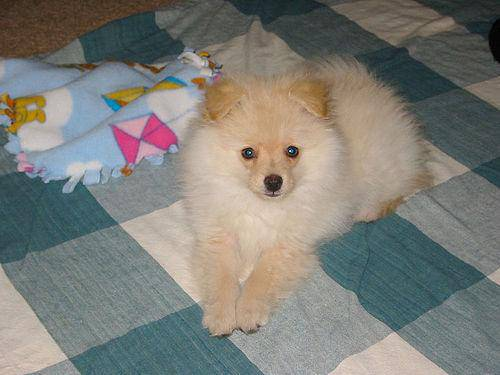

Predviđena rasa: pomeranian




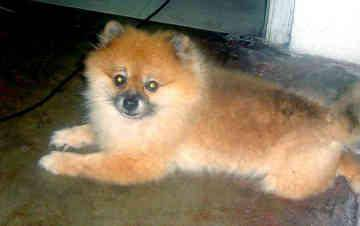

Predviđena rasa: pomeranian




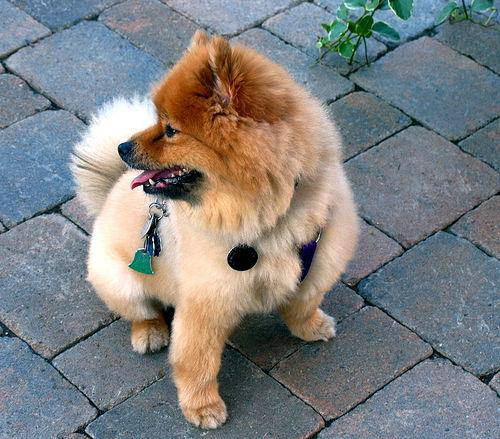

Predviđena rasa: pomeranian




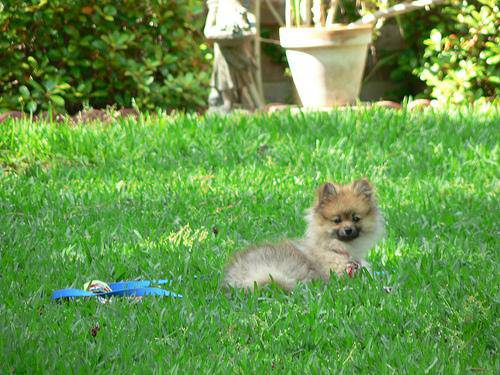

Predviđena rasa: pomeranian




In [54]:
filtered_df = result_df[result_df['breeds'] == 'pomeranian'].sample(10)
preview_predict(filtered_df)

# Zaključak

U ovom projektu uspešno su primenjene tehnike mašinskog učenja za klasifikaciju rase pasa na osnovu slika pasa.Korišćenjem prethodno obučenih modela kao baze za ekstrakciju osobina slika, treniraju se gusti slojevi kako bi se izvršila finalna klasifikacija. Kroz proces treniranja, model je naučio da prepoznaje karakteristike različitih rasa pasa na osnovu slika. Kao rezultat, dobijen je model koji može sa zadovoljavajućom tačnošću da predviđa rasu pasa na osnovu date slike.

Da bi se evaluirale performanse modela, on je primenjen na testni skup podataka i generisan je CSV fajl sa predviđenim rezultatima. Rezultati klasifikacije su bili zadovoljavajući, sa visokom tačnošću predviđanja za većinu rasa pasa. Međutim, bilo je i nekih izazova, posebno u razlikovanju sličnih rasa pasa koje imaju slične vizuelne karakteristike. Ovo može biti posledica nedovoljnog broja trening primera ili prirodnih ograničenja u klasifikaciji pasa na osnovu slika.

Projekat je pokazao važnost kvalitetnih trening podataka i odgovarajuće arhitekture modela za postizanje dobrih rezultata u predviđanju rase pasa. Takođe, prikazivanje rezultata i vizuelna analiza su bile korisne za razumevanje performansi modela i identifikaciju potencijalnih oblasti za poboljšanje.

U budućnosti, moguće je unaprediti model kroz dodatno fino podešavanje, korišćenje većeg obima podataka za treniranje, ili eksperimentisanje sa drugim arhitekturama i tehnikama mašinskog učenja. Takođe, moguće je proširiti projekat na druge vrste klasifikacija pasa ili primeniti sličan pristup za predviđanje drugih karakteristika ili atributa životinja.